In [14]:
import torch
from torch import nn,optim
import torch.nn.functional as F

In [15]:
from torchvision import datasets,transforms

transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

trainset=datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)


testset=datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download=True,train=False,transform=transform)
testloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [3]:
class Classifier(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(784,256)
        self.fc2=nn.Linear(256,128)
        self.fc3=nn.Linear(128,64)
        self.fc4=nn.Linear(64,10)
        
    def forward(self,x):
        
        x=x.view(x.shape[0],-1)
        
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=F.log_softmax(self.fc4(x),dim=1)
        
        return x

In [10]:
from tqdm import tqdm
model=Classifier()
criterion=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(),lr=0.003)

epochs=30

steps=0

train_losses,test_losses=[],[]

for e in tqdm(range(epochs)):
    
    running_loss=0
    testing_loss=0
    
    for images,labels in trainloader:
        optimizer.zero_grad()
        
        log_ps=model(images)
        
        loss=criterion(log_ps,labels)
        
        loss.backward()
        
        optimizer.step()
        
        training_loss=+loss.item()
        
    else:
        train_losses.append(training_loss/len(trainloader))
        
        with torch.no_grad():
            
            for images,labels in testloader:
                log_ps=model(images)
                loss=criterion(log_ps,labels)
                testing_loss=+loss.item()
            else:
                test_losses.append(testing_loss/len(trainloader))

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [08:21<00:00, 16.70s/it]


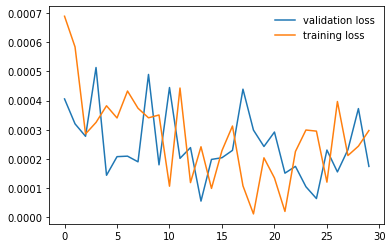

In [16]:
import matplotlib.pyplot as plt
plt.plot(test_losses,label='validation loss')
plt.plot(train_losses,label='training loss')
plt.legend(frameon=False)

In [ ]:
top_p,top_class=ps.topk(1,dim=1)
print(top_class[0:30])

In [ ]:
equals=top_class==labels.view(*top_class.shape)

In [ ]:
top_class.shape

In [7]:
len(trainloader)

938

In [24]:
accuracy=torch.mean(equals.type(torch.FloatTensor))
print(accuracy*100,"%")

tensor(9.3750) %


In [8]:
trainset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: C:\Users\Deep_Learning/.pytorch/F_MNIST_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [19]:
class Classifier(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(784,256)
        self.fc2=nn.Linear(256,128)
        self.fc3=nn.Linear(128,64)
        self.fc4=nn.Linear(64,10)
        
        self.dropout=nn.Dropout(p=0.2)
        
    def forward(self,x):
        
        x=x.view(x.shape[0],-1)
        
        x=self.dropout(F.relu(self.fc1(x)))
        x=self.dropout(F.relu(self.fc2(x)))
        x=self.dropout(F.relu(self.fc3(x)))
        
        
        
        x=F.log_softmax(self.fc4(x),dim=1)
        
        return x

In [21]:

from tqdm import tqdm
model=Classifier()
criterion=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(),lr=0.003)

epochs=30

steps=0

train_losses,test_losses=[],[]

for e in tqdm(range(epochs)):
    model.train()
    running_loss=0
    testing_loss=0
    
    for images,labels in trainloader:
        optimizer.zero_grad()
        
        log_ps=model(images)
        
        loss=criterion(log_ps,labels)
        
        loss.backward()
        
        optimizer.step()
        
        training_loss=+loss.item()
        
    else:
        train_losses.append(training_loss/len(trainloader))
        
        with torch.no_grad():
            
            model.eval()
            for images,labels in testloader:
                log_ps=model(images)
                loss=criterion(log_ps,labels)
                testing_loss=+loss.item()
            else:
                test_losses.append(testing_loss/len(trainloader))

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [08:27<00:00, 16.92s/it]


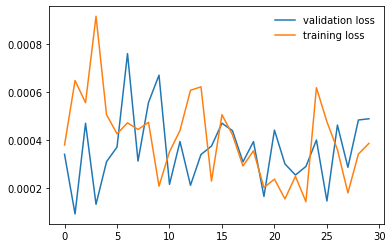

In [22]:
import matplotlib.pyplot as plt
plt.plot(test_losses,label='validation loss')
plt.plot(train_losses,label='training loss')
plt.legend(frameon=False)

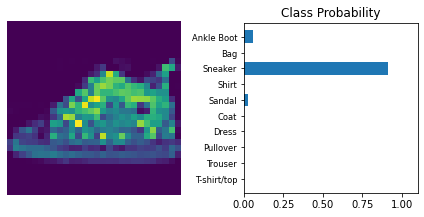

In [30]:
import numpy as np
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()
model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities
# helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')
view_classify(img.view(1, 28, 28), ps, version='Fashion')